In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.metrics import mean_squared_error
from fastai.imports import re

# dictionary: block and street to lat/long
latLong = {
  '212 Marsiling Cres': [1.44622, 103.77311],
  '1 Marsiling Dr': [1.44067, 103.77571],
  '2 Marsiling Dr': [1.43995, 103.77655],
  '6 Marsiling Dr': [1.44208, 103.77633],
  '22 Marsiling Dr': [1.44191, 103.77436],
  '23 Marsiling Dr': [1.44151, 103.77330],
  '24 Marsiling Dr': [1.44154, 103.77210],
  '30 Marsiling Dr': [1.44258, 103.77240],
  '31 Marsiling Dr': [1.44305, 103.77232],
  '32 Marsiling Dr': [1.44337, 103.77293],
  '202 Marsiling Dr': [1.44289, 103.77487],
  '204 Marsiling Dr': [1.44408, 103.77370],
  '206 Marsiling Dr': [1.44537, 103.77293],
  '12 Marsiling Lane': [1.44061, 103.77870],
  '12A Marsiling Lane': [1.44141, 103.77849],
  '13 Marsiling Lane': [1.44109, 103.77925],
  '15 Marsiling Lane': [1.44198, 103.77847],
  '17 Marsiling Lane': [1.44273, 103.77804],
  '18 Marsiling Lane': [1.44342, 103.77787],
  '19 Marsiling Lane': [1.44328, 103.77730],
  '180A Marsiling Rd': [1.43913, 103.77814],
  '180B Marsiling Rd': [1.43913, 103.77835],
  '125 Marsiling Rise': [1.43849, 103.77953],
  '129 Marsiling Rise': [1.43783, 103.77871],
  '130 Marsiling Rise': [1.43812, 103.77870],
  '131 Marsiling Rise': [1.43849, 103.77862],
  '132 Marsiling Rise': [1.43829, 103.77803],
  '570A Woodlands Ave 1': [1.43071, 103.79105],
  '570B Woodlands Ave 1': [1.43091, 103.79077],
  '571C Woodlands Ave 1': [1.43040, 103.78997],
  '693A Woodlands Ave 6': [1.43864, 103.80377],
  '693B Woodlands Ave 6': [1.43834, 103.80388],
  '693C Woodlands Ave 6': [1.43793, 103.80407],
  '780A Woodlands Cres': [1.44882, 103.80067],
  '780B Woodlands Cres': [1.44902, 103.80102],
  '780C Woodlands Cres': [1.44913, 103.80139],
  '780F Woodlands Cres': [1.44788, 103.80124],
  '782C Woodlands Cres': [1.44780, 103.80344],
  '782D Woodlands Cres': [1.44823, 103.80283],
  '573A Woodlands Dr 16': [1.43133, 103.79828],
  '573B Woodlands Dr 16': [1.43094, 103.79781],
  '573C Woodlands Dr 16': [1.43052, 103.79767],
  '574A Woodlands Dr 16': [1.43011, 103.79710],
  '574B Woodlands Dr 16': [1.42970, 103.79685],
  '886A Woodlands Dr 50': [1.43830, 103.79489],
  '886B Woodlands Dr 50': [1.43824, 103.79387],
  '886D Woodlands Dr 50': [1.43794, 103.79490],
  '887B Woodlands Dr 50': [1.43710, 103.79406],
  '887C Woodlands Dr 50': [1.43697, 103.79468],
  '694A Woodlands Dr 62': [1.43916, 103.80419],
  '694B Woodlands Dr 62': [1.43926, 103.80517],
  '694C Woodlands Dr 62': [1.43862, 103.80561],
  '694D Woodlands Dr 62': [1.43843, 103.80544],
  '717A Woodlands Dr 70': [1.44049, 103.79836],
  '717B Woodlands Dr 70': [1.44135, 103.79861],
  '784B Woodlands Rise': [1.44565, 103.80499],
  '784C Woodlands Rise': [1.44602, 103.80500],
  '785B Woodlands Rise': [1.44636, 103.80527],
  '101 Woodlands St 13': [1.43612, 103.78206],
  '102 Woodlands St 13': [1.43611, 103.78117],
  '111 Woodlands St 13': [1.43784, 103.78219],
  '145 Woodlands St 13': [1.43612, 103.77324],
  '146 Woodlands St 13': [1.43612, 103.77409],
  '148 Woodlands St 13': [1.43578, 103.77402],
  '149 Woodlands St 13': [1.43578, 103.77303],
  '151 Woodlands St 13': [1.43546, 103.77423],
  '152 Woodlands St 13': [1.43505, 103.77424],
  '155 Woodlands St 13': [1.43477, 103.77459],
  '157 Woodlands St 13': [1.43437, 103.77480],
  '158 Woodlands St 13': [1.43407, 103.77478],
  '159 Woodlands St 13': [1.43371, 103.77459],
  '160 Woodlands St 13': [1.43337, 103.77469],
  '161 Woodlands St 13': [1.43337, 103.77367],
  '166 Woodlands St 13': [1.43374, 103.77543],
  '302A Woodlands St 31': [1.43185, 103.77527],
  '310 Woodlands St 31': [1.43009, 103.77598],
  '311 Woodlands St 31': [1.43185, 103.77527],
  '313 Woodlands St 31': [1.43049, 103.77617],
  '314 Woodlands St 31': [1.43119, 103.77607],
  '316 Woodlands St 31': [1.43149, 103.77637],
  '317 Woodlands St 31': [1.43190, 103.77627],
  '318 Woodlands St 31': [1.43185, 103.77731],
  '319 Woodlands St 31': [1.43150, 103.77740],
  '411 Woodlands St 41': [1.42852, 103.77282],
  '419 Woodlands St 41': [1.42852, 103.77457],
  '818 Woodlands St 82': [1.44167, 103.79018],
  '820 Woodlands St 82': [1.44101, 103.79014],
  '848 Woodlands St 82': [1.44181, 103.79198],
  '849 Woodlands St 82': [1.44147, 103.79199],
  '834 Woodlands St 83': [1.44009, 103.79108],
}

# clean up data: area, date, floor, price
def load_csv():
  return pd.read_csv('./data/2305_3rm_woodlands.csv')
def price_cleanup(df):
  df['price'] = df.price.apply(lambda x:float(x.replace('$','').replace(',','')) if isinstance(x,str) else x)
  return df
def area_cleanup(df):
  df['area'] = df.area.str.split('\n',expand=True)[0].astype(float) if df.area.dtype != 'float64' else df.area
  return df  
def date_cleanup(df):
  df['date'] = pd.to_datetime(df.date, format="%m/%d/%y")
  df['date'] = df.date.apply(lambda x:float(x.toordinal()) if not isinstance(x,float) else x)
  return df
floor_dict = { f'0{i*3+1} to 0{i*3+3}' if i < 3 else f'{i*3+1} to {i*3+3}': i*3+2  for i in range(11)  }
def floor_cleanup(df):
  df['floor'] = df.floor.apply(lambda x:float(floor_dict[x]) if isinstance(x,str) else x)
  return df


def load_and_cleanup():
  df = load_csv()
  price_cleanup(df)
  area_cleanup(df)
  date_cleanup(df)
  floor_cleanup(df)
  df.drop(["block", "street", "lease"], axis=1, inplace = True)
  return df



df = load_and_cleanup()
xs = df[["floor", "area", "date", "year"]]
y = df["price"]

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

# just 8 leaf nodes for easy analysis
m = DecisionTreeRegressor(max_leaf_nodes=8).fit(xs,y)
mean_squared_error(y, m.predict(xs),squared=False)




19116.33495582736

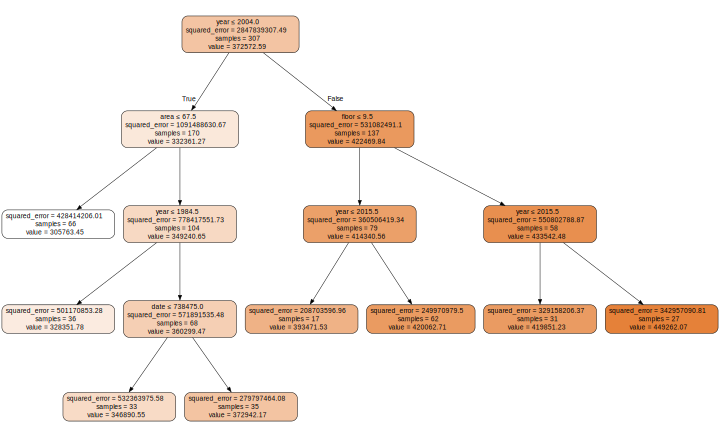

In [4]:
draw_tree(m, xs, size=10)

In [14]:
pd.Timestamp.fromordinal(738475)

Timestamp('2022-11-16 00:00:00')

17330.64515258035 vs 20932.093036743863. full data mse: 16374.267551863188


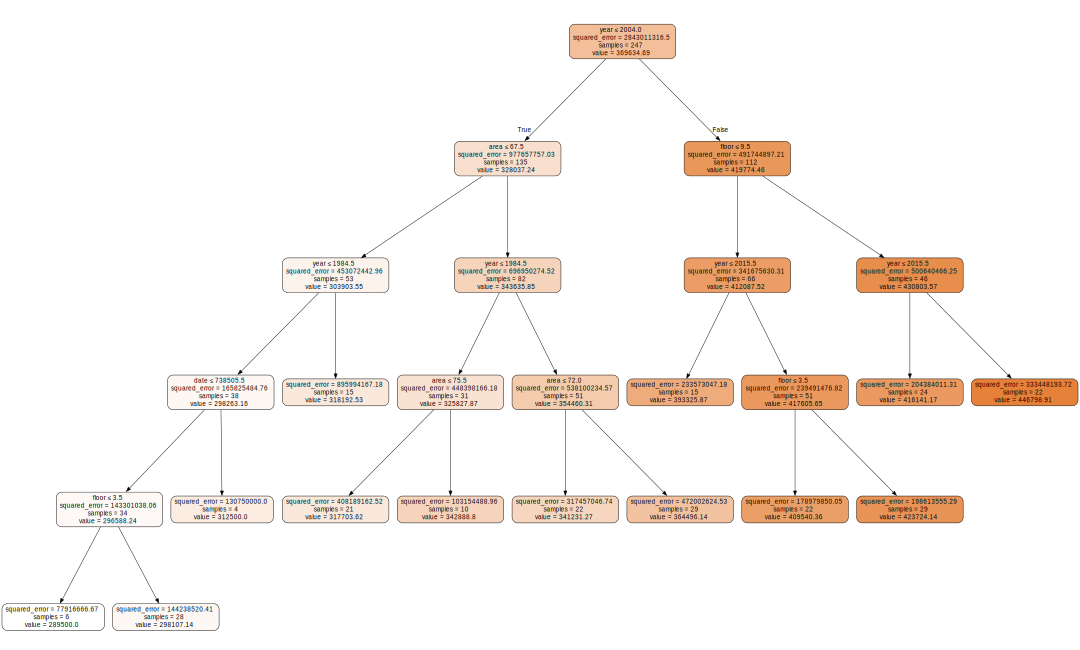

In [2]:
# training vs validation
trn_xs, trn_y = (xs[60:], y[60:])
val_xs, val_y = (xs[:60], y[:60])

m2 = DecisionTreeRegressor(min_samples_split=30).fit(trn_xs,trn_y)
m3 = DecisionTreeRegressor(min_samples_split=30).fit(xs,y)
full_data_mse = mean_squared_error(y, m3.predict(xs),squared=False)
mse = mean_squared_error(val_y, m2.predict(val_xs),squared=False)
trn_mse = mean_squared_error(trn_y, m2.predict(trn_xs), squared=False)
print(f"{trn_mse} vs {mse}. full data mse: {full_data_mse}")
draw_tree(m2, val_xs, size=15)

In [4]:
from sklearn.ensemble import RandomForestRegressor as rf
m4 = rf().fit(trn_xs,trn_y)

mse = mean_squared_error(val_y, m4.predict(val_xs),squared=False)
trn_mse = mean_squared_error(trn_y, m4.predict(trn_xs), squared=False)
print(f"{trn_mse} vs {mse}.")

8659.993131696054 vs 16524.79868590435.


In [50]:
def get_tree(prop=0.75,replace=True):
  n = len(trn_y)
  idxs = np.random.choice(n, int(n*prop), replace=replace)
  return DecisionTreeRegressor(min_samples_split=30).fit(trn_xs.iloc[idxs], trn_y.iloc[idxs])

In [51]:
# random forests
trees = [get_tree(0.75) for t in range(100)]
all = [t.predict(val_xs) for t in trees]
avg = np.stack(all).mean(0)

forest_mse = mean_squared_error(val_y, avg,squared=False)
print(f"validation error for forests {forest_mse} vs {mse}")

validation error for forests 18951.848770577904 vs 20932.093036743863


In [22]:
def lease_to_float(str):
  result = re.search("(\d+) years\\n(\d+) months", str)
  if (result is None):
    result = re.search("(\d+) years", str)
    year = result.groups()[0]
    return float(year)
  year,month = result.groups()
  return float(year)+float(month)/12
def lease_cleanup(df):
  df['lease'] = df.lease.apply(lambda x:lease_to_float(x) if isinstance(x,str) else x)
  return df
def lat_long(df):
  adds = (df.block + df.street).str.replace(u'\xa0', u' ')
  latLongs = adds.apply(lambda x: latLong[x])
  df['lat'] = latLongs.apply(lambda x: x[0])
  df['long'] = latLongs.apply(lambda x: x[1])
  df.drop(['block', 'street'], axis=1, inplace=True)
  return df

# use lat/long and lease data
def load_and_cleanup():
  df = load_csv()
  price_cleanup(df)
  area_cleanup(df)
  date_cleanup(df)
  floor_cleanup(df)
  lease_cleanup(df)
  lat_long(df)
  df.drop(["year"], axis=1, inplace = True)
  return df
df2 = load_and_cleanup()
df2




,floor,area,lease,price,date,lat,long
0,2.0,67.0,53.166667,300500.0,738641.0,1.44154,103.77210
1,11.0,65.0,51.750000,315000.0,738641.0,1.44198,103.77847
2,23.0,67.0,91.250000,430000.0,738641.0,1.43913,103.77814
3,8.0,68.0,94.416667,445000.0,738641.0,1.43834,103.80388
4,8.0,68.0,94.416667,450000.0,738641.0,1.43862,103.80561
...,...,...,...,...,...,...,...
302,8.0,67.0,92.166667,395000.0,738276.0,1.44780,103.80344
303,14.0,67.0,91.750000,420000.0,738276.0,1.43830,103.79489
304,5.0,71.0,94.666667,420000.0,738276.0,1.44049,103.79836
305,8.0,68.0,95.250000,400000.0,738276.0,1.44636,103.80527


15590.498502237007 vs 19921.728257665978


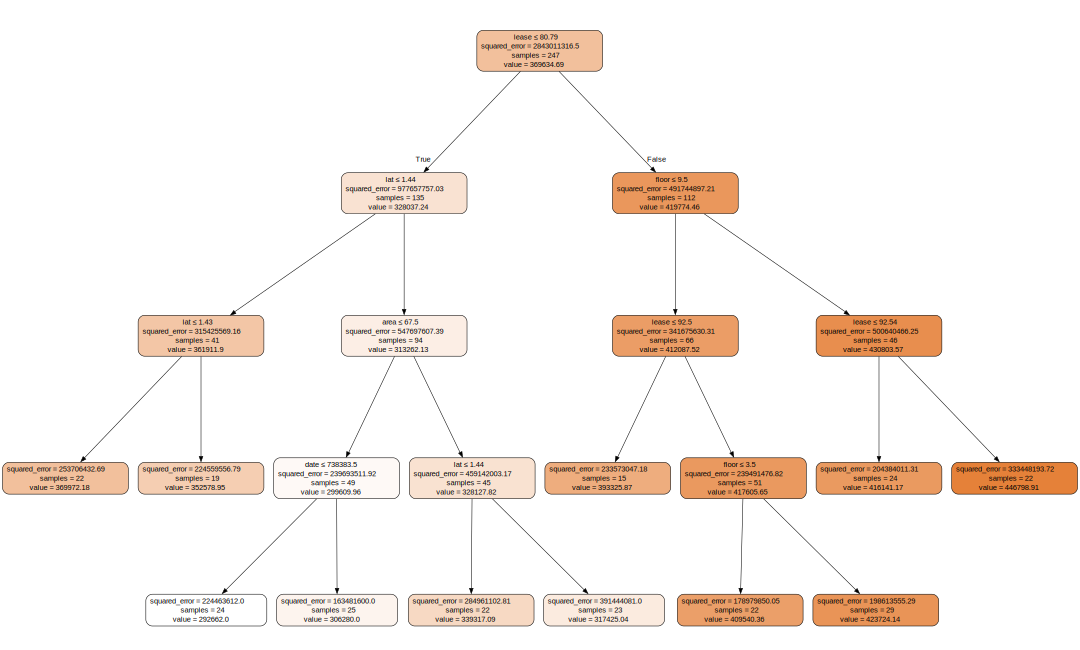

In [35]:
xs2 = df2[["floor", "area", "date", "lease", 'lat', 'long']]
y2 = df2["price"]

# just 8 leaf nodes for easy analysis
m2 = DecisionTreeRegressor(max_leaf_nodes=8).fit(xs2,y2)
whole_error = mean_squared_error(y2, m2.predict(xs2),squared=False)

# training vs validation
trn_xs, trn_y = (xs2[60:], y2[60:])
val_xs, val_y = (xs2[:60], y2[:60])

m2 = DecisionTreeRegressor(min_samples_split=30).fit(trn_xs,trn_y)
single_mse = mean_squared_error(val_y, m2.predict(val_xs),squared=False)
trn_mse = mean_squared_error(trn_y, m2.predict(trn_xs), squared=False)
print(f"{trn_mse} vs {single_mse}")
draw_tree(m2, val_xs, size=15)

In [41]:
# random forests
trees = [get_tree(0.75) for t in range(100)]
all = [t.predict(val_xs) for t in trees]
avg = np.stack(all).mean(0)

forest_mse = mean_squared_error(val_y, avg,squared=False)
print(f"validation error for forests {forest_mse} vs {single_mse}")

validation error for forests 19599.759570479047 vs 19921.728257665978
